# Basic Boosters

Testing basic boosters that are not XGBoost.
Testing effect of oversampling methods.

* [AdaBoost](#AdaBoost)
* [Gradient Boosting](#Gradient-Boosting)
* [Balance Testing](#Balance-Testing)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.facecolor']='w'

In [3]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score, precision_score

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

In [4]:
# set up data train, test, val

teledf = pd.read_csv('data/teledf_final.csv', index_col=0)
teledf.head()

,Total day minutes,Area code_408,Number vmail messages,Churn,Total eve charge,Area code_415,Area code_510,Total day calls,Total intl calls,Total eve minutes,Total intl charge,International plan,Customer service calls,Voice mail plan,Total intl minutes,Total day charge
0,265.1,0.0,25.0,0.0,16.78,1.0,0.0,110.0,3.0,197.4,2.70,0.0,1.0,1.0,10.0,45.07
1,161.6,0.0,26.0,0.0,16.62,1.0,0.0,123.0,3.0,195.5,3.70,0.0,1.0,1.0,13.7,27.47
2,243.4,0.0,0.0,0.0,10.30,1.0,0.0,114.0,5.0,121.2,3.29,0.0,0.0,0.0,12.2,41.38
3,299.4,1.0,0.0,0.0,5.26,0.0,0.0,71.0,7.0,61.9,1.78,1.0,2.0,0.0,6.6,50.90
4,166.7,0.0,0.0,0.0,12.61,1.0,0.0,113.0,3.0,148.3,2.73,1.0,3.0,0.0,10.1,28.34


In [5]:
X = teledf.drop(columns='Churn')
y = teledf.Churn

In [6]:
X_rest, X_test, y_rest, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_rest, y_rest, test_size=0.2, random_state=42)

# AdaBoost

In [8]:
# fit model

ada_model = AdaBoostClassifier(random_state=42)

ada_model.fit(X_train, y_train.values.ravel())
ada_model.score(X_train,y_train), ada_model.score(X_val, y_val)

(0.8916510318949343, 0.8632958801498127)

In [9]:
y_train_ada_pred = ada_model.predict(X_train)
y_val_ada_pred = ada_model.predict(X_val)

In [28]:
# observe metrics

def getscores (true, pred):
    print(f'Recall: {recall_score(true,pred):.4f}','\n',
          f'Precision: {precision_score(true,pred):.4f}')

In [29]:
getscores(y_train, y_train_ada_pred)
getscores(y_val, y_val_ada_pred)

Recall: 0.3935 
 Precision: 0.7394
Recall: 0.3750 
 Precision: 0.5660


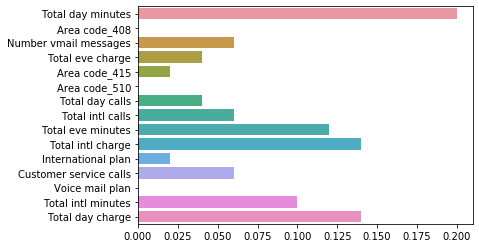

In [12]:
sns.barplot(y=X.columns,x=ada_model.feature_importances_)


Text(0.5, 1.0, 'Confusion Matrix for AdaBoost')

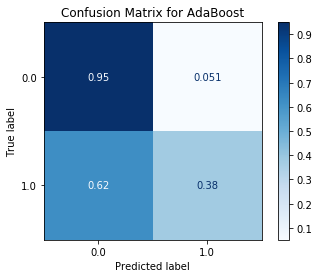

In [13]:
plot_confusion_matrix(ada_model, 
                      X_val,
                      y_val,
                      cmap='Blues', 
                      normalize='true')
plt.title('Confusion Matrix for AdaBoost')

# Gradient Boosting

In [14]:
# fit model

gb_model = GradientBoostingClassifier(random_state = 42)

gb_model.fit(X_train, y_train)
gb_model.score(X_train, y_train), gb_model.score(X_val, y_val)

(0.9718574108818011, 0.947565543071161)

In [15]:
y_train_gb_pred = gb_model.predict(X_train)
y_val_gb_pred = gb_model.predict(X_val)

In [16]:
# observe metrics

getscores(y_train, y_train_gb_pred)
getscores(y_val, y_val_gb_pred)

Recall: 0.8193548387096774 
 Precision: {precision_score(true,pred)}
Recall: 0.7125 
 Precision: {precision_score(true,pred)}


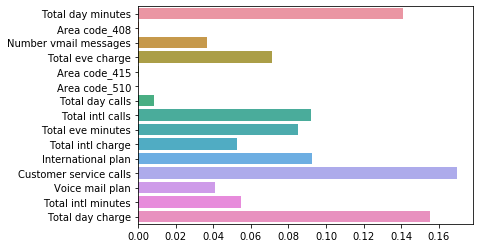

In [17]:
sns.barplot(y=X.columns, x=gb_model.feature_importances_)

Text(0.5, 1.0, 'Confusion Matrix for GradientBoost')

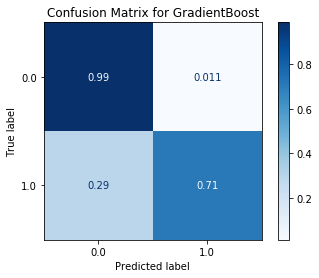

In [18]:
plot_confusion_matrix(gb_model, 
                      X_val,
                      y_val,
                      cmap='Blues', 
                      normalize='true')
plt.title('Confusion Matrix for GradientBoost')

# Balance Testing

Since dataset is not large, using oversampling methods.

random_over_sampler.RandomOverSampler: 
 Train recall: 0.818331503841932 
 Test recall: 0.6559139784946236 
 Train precision: 0.8628472222222222 
 Test precision: 0.8628472222222222


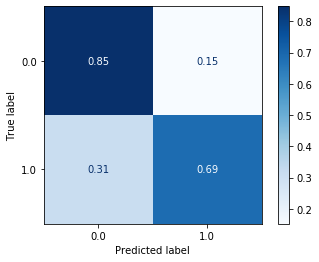

smote.SMOTE: 
 Train recall: 0.889681668496158 
 Test recall: 0.4946236559139785 
 Train precision: 0.9310740953475014 
 Test precision: 0.9310740953475014


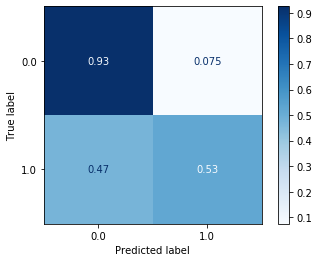

adasyn.ADASYN: 
 Train recall: 0.8822515795519816 
 Test recall: 0.4731182795698925 
 Train precision: 0.9303452453058753 
 Test precision: 0.9303452453058753


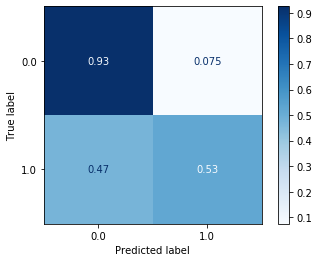

In [20]:
# testing for adaboost

for i in [RandomOverSampler, SMOTE, ADASYN]:
    balancer = i(random_state=42)
    X_train_bal, y_train_bal = balancer.fit_resample(X_train, y_train)
    bal_ada_model = AdaBoostClassifier(random_state=42)
    bal_ada_model.fit(X_train_bal, y_train_bal)
    y_train_bal_pred = bal_ada_model.predict(X_train_bal)
    y_test_bal_pred = bal_ada_model.predict(X_test)
    print(f'{str(i)[32:-2]}:', '\n',
          'Train recall:', recall_score(y_train_bal, y_train_bal_pred), '\n',
          'Test recall:', recall_score(y_test, y_test_bal_pred), '\n',
         'Train precision:', precision_score(y_train_bal, y_train_bal_pred), '\n',
         'Test precision:', precision_score(y_train_bal, y_train_bal_pred))
    plot_confusion_matrix(bal_ada_model, 
                      X_val,
                      y_val,
                      cmap='Blues', 
                      normalize='true')
    plt.show()

Random oversampling improved confusion matrix, but Gradient Boosting is still the superior booster.

random_over_sampler.RandomOverSampler: 
 Train recall: 0.8913282107574094 
 Test recall: 0.7956989247311828 
 Train precision: 0.9586776859504132 
 Test precision: 0.9586776859504132


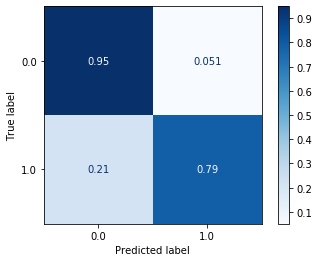

smote.SMOTE: 
 Train recall: 0.9527991218441273 
 Test recall: 0.6989247311827957 
 Train precision: 0.9886104783599089 
 Test precision: 0.9886104783599089


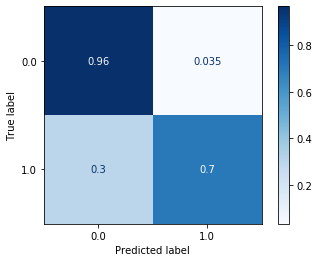

adasyn.ADASYN: 
 Train recall: 0.9523262492820218 
 Test recall: 0.6774193548387096 
 Train precision: 0.9845605700712589 
 Test precision: 0.9845605700712589


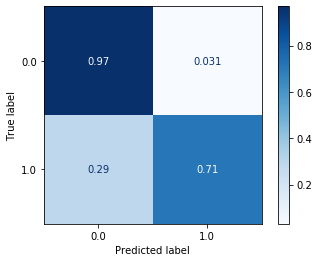

In [21]:
# testing for gradient boosting

for i in [RandomOverSampler, SMOTE, ADASYN]:
    balancer = i(random_state=42)
    X_train_bal, y_train_bal = balancer.fit_resample(X_train, y_train)
    bal_gb_model = GradientBoostingClassifier(random_state=42)
    bal_gb_model.fit(X_train_bal, y_train_bal)
    y_train_bal_pred = bal_gb_model.predict(X_train_bal)
    y_test_bal_pred = bal_gb_model.predict(X_test)
    print(f'{str(i)[32:-2]}:', '\n',
          'Train recall:', recall_score(y_train_bal, y_train_bal_pred), '\n',
          'Test recall:', recall_score(y_test, y_test_bal_pred), '\n',
         'Train precision:', precision_score(y_train_bal, y_train_bal_pred), '\n',
         'Test precision:', precision_score(y_train_bal, y_train_bal_pred))
    plot_confusion_matrix(bal_gb_model, 
                      X_val,
                      y_val,
                      cmap='Blues', 
                      normalize='true')
    plt.show()

Best of these is Random Oversampling for Gradient Boost.